In [42]:
%matplotlib inline
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler as SS
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

scale = SS()

columnsToRetrieve = ['odometer_value',
                     'year_produced', 'engine_capacity', 'price_usd']

df = pd.read_csv(
    "./Cars.csv", usecols=columnsToRetrieve)

df.dropna(inplace=True)
print("df.info()", df.info())

def predict(x):
    return intercept + (x * slope)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38521 entries, 0 to 38530
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   odometer_value   38521 non-null  int64  
 1   year_produced    38521 non-null  int64  
 2   engine_capacity  38521 non-null  float64
 3   price_usd        38521 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 1.5 MB
df.info() None


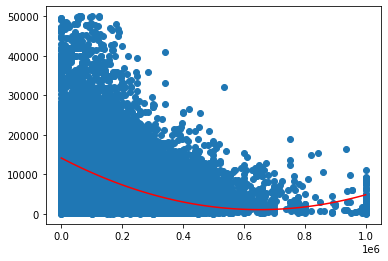

float64
float64
The r2 score is:  0.2208575397387016


In [72]:
X = df['odometer_value']
Y = df['price_usd']


x = np.array(X)
y = np.array(Y)

polyReg = np.poly1d(np.polyfit(x,y,2))

prline = np.linspace(0,1000000,100)
plt.scatter(X, Y)
plt.plot(prline, polyReg(prline), c='r')
plt.show()

r2 = r2_score(y, polyReg(x))

print('The r2 score is: ', r2)

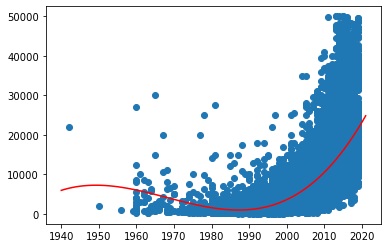

float64
float64
The r2 score is:  0.5969150281416292


In [74]:
X = df['year_produced']
Y = df['price_usd']

x = np.array(X)
y = np.array(Y)

polyReg_yp = np.poly1d(np.polyfit(x,y,3))

ypline = np.linspace(1940,2021,100)
plt.scatter(x, y)
plt.plot(ypline, polyReg_yp(ypline), c='r')
plt.show()

r2 = r2_score(y, polyReg_yp(x))
print('The r2 score is: ', r2)


Engine Size impact on the Price

slope:		 2839.3268730587265
intercept:	 801.8867248252955
r_value:	 0.08796959949254692
p_value:	 0.0
std_error:	 46.58179727849928



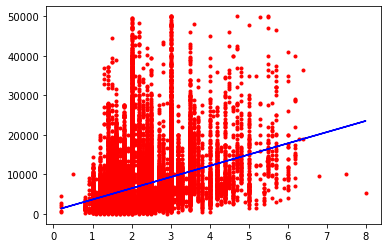

In [47]:
X = df['engine_capacity']
Y = df['price_usd']

slope, intercept, r_value, p_value, std_error = stats.linregress(
    X, Y)

print('')
print("Engine Size impact on the Price")
print('')
print("slope:\t\t", slope)
print("intercept:\t", intercept)
print("r_value:\t", r_value ** 2)
print("p_value:\t", p_value)
print("std_error:\t", std_error)
print('')

fitLine = predict(X)

plt.scatter(X, Y, c='r', marker=".")
plt.plot(X, fitLine, c='b', linewidth='1.5')
plt.show()

In [48]:
print("All three Dimensions Factored in:")



X = df[['odometer_value', 'year_produced', 'engine_capacity']]
Y = df['price_usd']
X[['odometer_value', 'year_produced', 'engine_capacity']] = scale.fit_transform(X[['odometer_value', 'year_produced', 'engine_capacity']].values)
X = sm.add_constant(X)

print(X)

estimator = sm.OLS(Y, X).fit()

print(estimator.summary())

All three Dimensions Factored in:
       const  odometer_value  year_produced  engine_capacity
0        1.0       -0.432979       0.875318         0.662782
1        1.0        0.302004      -0.116665         1.407751
2        1.0        1.125184      -0.240663         0.662782
3        1.0       -1.755946      -0.488659         1.407751
4        1.0        0.228505      -0.240663         0.662782
...      ...             ...            ...              ...
38526    1.0        0.302004      -0.364661         2.152720
38527    1.0        0.529848       0.131331         0.215801
38528    1.0        3.888400      -0.364661         2.152720
38529    1.0       -1.682448      -0.240663        -0.082187
38530    1.0        0.358810      -0.364661         0.513789

[38521 rows x 4 columns]
                            OLS Regression Results                            
Dep. Variable:              price_usd   R-squared:                       0.599
Model:                            OLS   Adj. R-squ

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/envs/tf/lib/python3.7/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
